In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('P05-01 (2).csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,8395,62,0.000


<Axes: title={'center': 'Total Transaksi selama 12 Bulan Terakhir oleh Pelanggan Perempuan'}, xlabel='Total Transaksi', ylabel='Frekuensi Pengguna'>

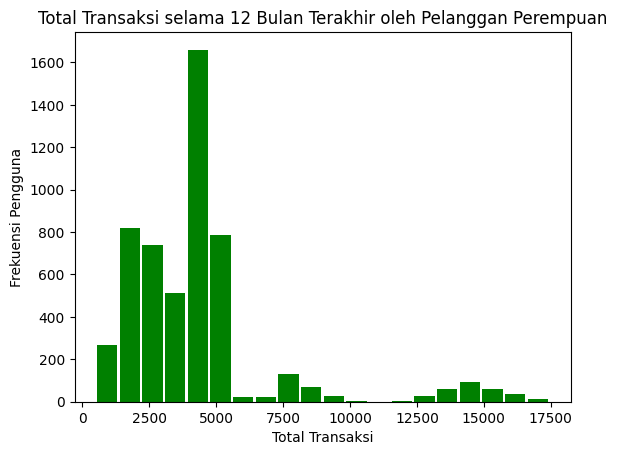

In [27]:
#1. Histogram distribusi total transaksi selama 12 bulan terakhir oleh pengguna dengan jenis kelamin perempuan (F), dengan bins 20.
r = df[df['Gender'] == 'F']
r['Total_Trans_Amt'].plot(kind='hist',bins=20, title='Total Transaksi selama 12 Bulan Terakhir oleh Pelanggan Perempuan', rwidth=0.9, xlabel='Total Transaksi', ylabel='Frekuensi Pengguna', color='green')

<Axes: title={'center': 'Demografi Status Perkawinan pada Pengguna Tertentu'}>

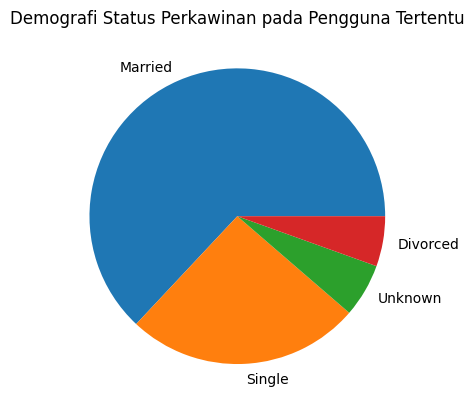

In [28]:
#2. Pie chart perbandingan banyaknya masing-masing status perkawinan dari pengguna dengan total transaksi selama 12 bulan terakhir di bawah 2000.
r = df[df['Total_Trans_Amt']<2000]
r['Marital_Status'].value_counts().plot(kind='pie', title='Demografi Status Perkawinan pada Pengguna Tertentu', ylabel='',color='red')

<Axes: title={'center': 'Korelasi Lama Penggunaan Kartu Kredit dengan Rata-Rata Rasio Penggunaan Kartu Kredit'}, xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

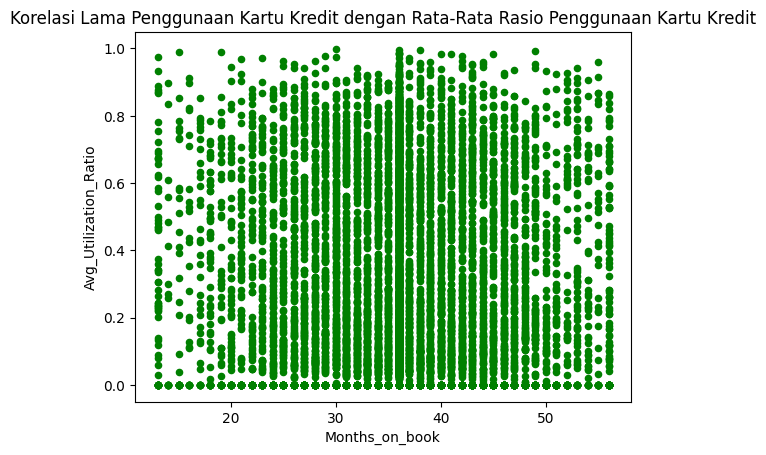

In [29]:
#3. Scatter plot dengan lama penggunaan kartu kredit dalam bulan sebagai x dan rata-rata rasio penggunaan kartu kredit sebagai y dari pengguna dengan tipe kartu Blue.
r = df[df['Card_Category'] == 'Blue']
r.plot(kind='scatter', x='Months_on_book', y='Avg_Utilization_Ratio', title='Korelasi Lama Penggunaan Kartu Kredit dengan Rata-Rata Rasio Penggunaan Kartu Kredit',color='green')

<Axes: title={'center': 'jumlah pengguna berdasarkan status keaktifan'}, ylabel='Attrition_Flag'>

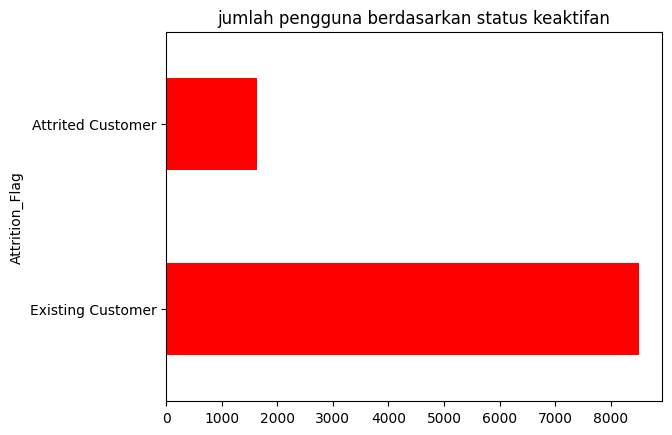

In [30]:
#4. Horizontal bar chart menggambarkan jumlah pengguna dari setiap status keaktifan pengguna.
df['Attrition_Flag'].value_counts().plot(kind='barh', title='jumlah pengguna berdasarkan status keaktifan', color='red')

<Axes: xlabel='Attrition_Flag'>

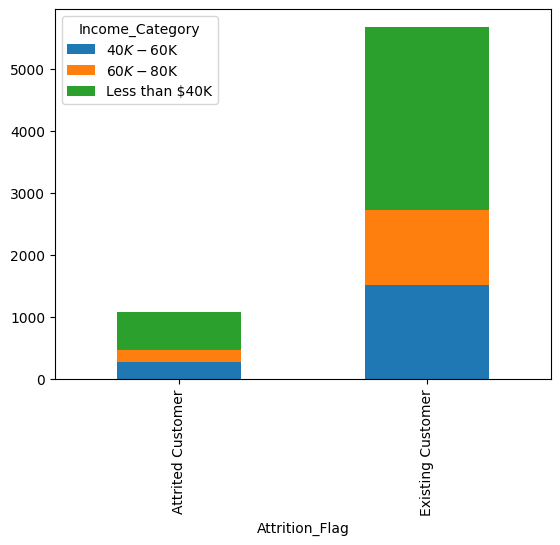

In [31]:
#5. Stacked bar chart dari pengguna dengan kategori penghasilan ’Less than $40K’, ’$40K - $60K’, dan ’$60K- $80K’ dengan status keaktifan pengguna sebagai sumbu x dan kategori penghasilan sebagai stacked y.
r = df[(df['Income_Category'] == 'Less than $40K')| (df['Income_Category'] == '$40K - $60K')| (df['Income_Category'] == '$60K - $80K')]
r.groupby(['Attrition_Flag', 'Income_Category']).size().unstack().plot(kind='bar', stacked=True)